# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через pd.read_pickle

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import timeit

In [3]:
data = pd.read_pickle('../data/train.pickle')
data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
for key in data.keys():
    print(f'shape of {key} - {data[key].shape}')

shape of coords - (34799, 4)
shape of labels - (34799,)
shape of features - (34799, 32, 32, 3)
shape of sizes - (34799, 2)


***Посмотрим на одну картинку из features***

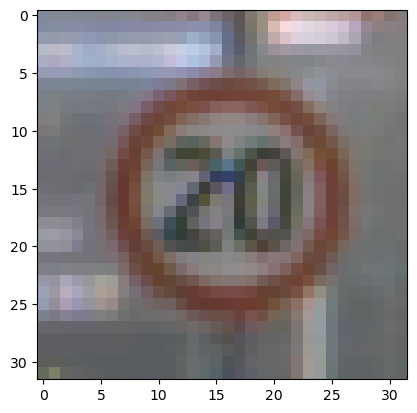

In [5]:
idx = data['features'][10000]
plt.imshow(idx)
plt.show()

## Обучим логистическую регрессию
целевая переменная - labels 

обучаем на features

In [6]:
X = data['features']
y = data['labels']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [9]:
# model = LogisticRegression(max_iter = 1000)
# model.fit(X_train, y_train)

***Получаем ошибку ValueError: Found array with dim 4. LogisticRegression expected <= 2***

Чтобы исправить, сделаем reshape, чтобы X_train и y_train имели правильную размерность

In [10]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [11]:
%%time
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

CPU times: user 48min 37s, sys: 2min 45s, total: 51min 23s
Wall time: 7min 10s


LogisticRegression(max_iter=1000)

In [12]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [13]:
y_pred = model.predict(X_test)

## Измерим качество

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.93      0.91      0.92       393
           2       0.94      0.92      0.93       387
           3       0.88      0.91      0.90       269
           4       0.92      0.94      0.93       355
           5       0.87      0.91      0.89       296
           6       0.97      0.95      0.96        64
           7       0.93      0.95      0.94       282
           8       0.90      0.96      0.93       218
           9       0.97      0.97      0.97       248
          10       0.98      0.98      0.98       379
          11       0.97      0.96      0.97       222
          12       1.00      0.98      0.99       372
          13       0.98      0.95      0.97       408
          14       0.96      0.97      0.97       134
          15       0.95      0.90      0.93        93
          16       0.99      0.99      0.99        70
    

### Выбор метрики

accuracy в случае несбалансированных классов может быть обманчивой, поэтому я выбрала взвешенное среднее (среднее значение, рассчитанное путем усреднения метрик с учетом весов, которые определяются количеством экземпляров в каждом классе), значит, классы с большим количеством экземпляров имеют более значимое влияние на итоговую метрику, чем классы с меньшим числом экземпляров, что позволяет лучше учесть дисбаланс классов



In [16]:
precision_score(y_pred, y_test, average = 'weighted')

0.9498996111743586

Confusion Matrix:
[[ 30   2   0 ...   0   0   0]
 [  0 357   7 ...   0   1   0]
 [  2  11 355 ...   0   0   0]
 ...
 [  0   0   0 ...  54   0   0]
 [  0   0   0 ...   0  45   0]
 [  0   0   0 ...   0   1  35]]


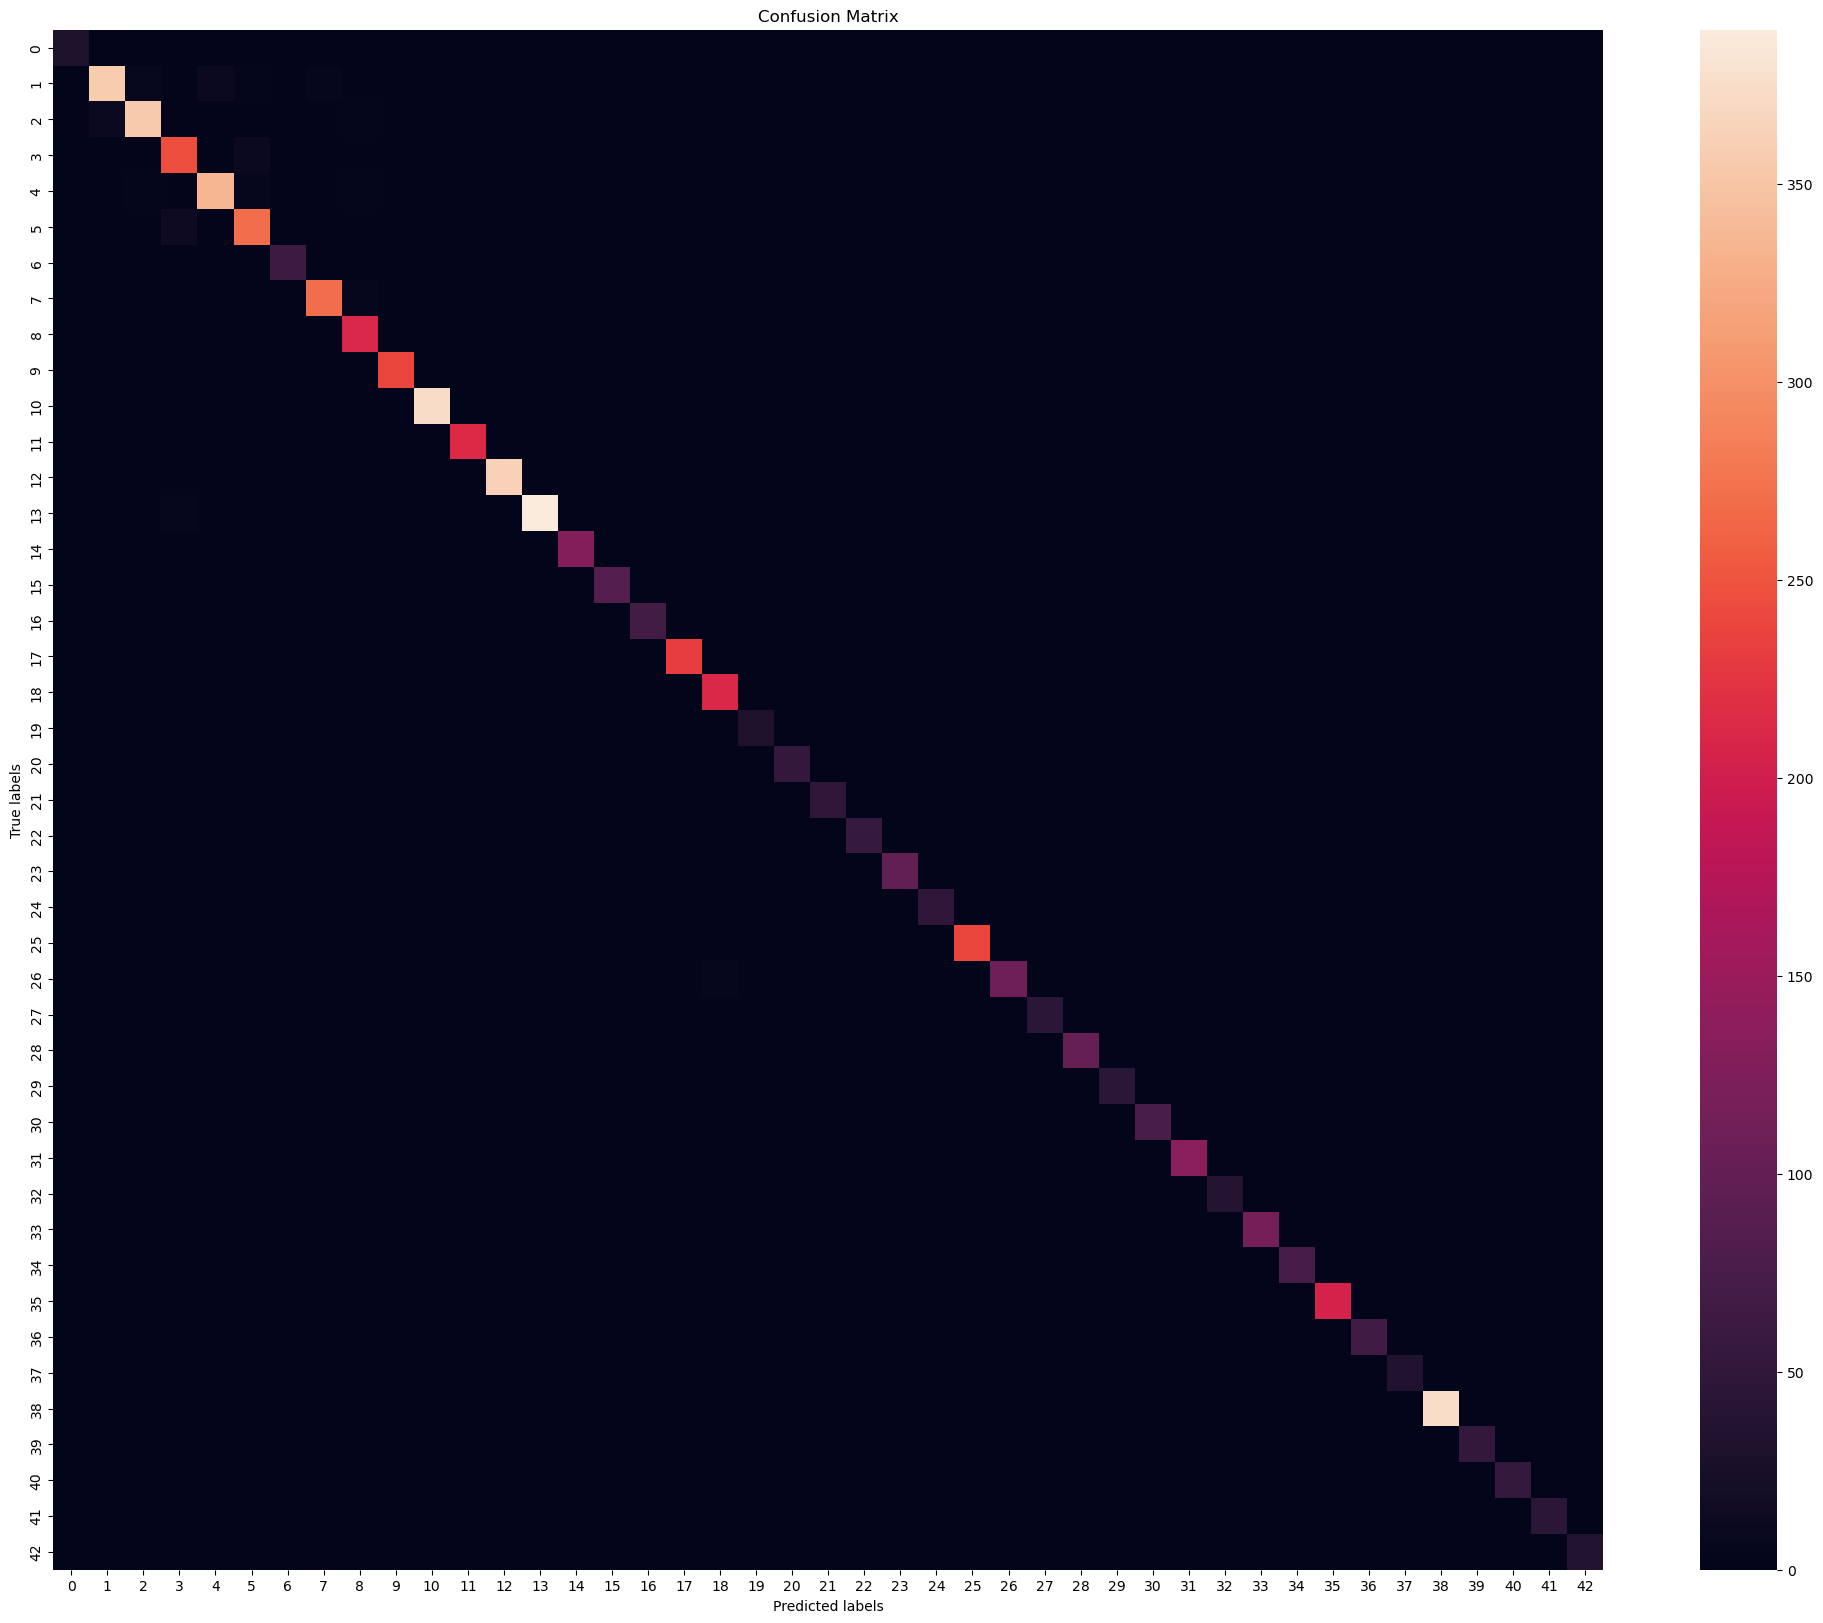

In [17]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize = (25, 20))
sns.heatmap(conf_matrix)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
conf_matrix.shape

(43, 43)

### Словарь с названиями знаков из классов

In [19]:
df = pd.read_csv('../data/label_names.csv')

In [20]:
signs_dict = df.set_index('ClassId').to_dict()['SignName']
signs_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

## Найдем топ 3 самых путающихся знаков

In [21]:
max_error_classes = np.array([-1, -1, -1])
true_classes = np.array([-1, -1, -1])
false_classes = np.array([-1, -1, -1])

for i in range(43):
    for j in range(43):
        if i != j and conf_matrix[i][j] > max_error_classes[0]:
            max_error_classes[2] = max_error_classes[1]
            max_error_classes[1] = max_error_classes[0]
            max_error_classes[0] = conf_matrix[i][j]
            true_classes[2] = true_classes[1]
            true_classes[1] = true_classes[0]
            true_classes[0] = i
            false_classes[2] = false_classes[1]
            false_classes[1] = false_classes[0]
            false_classes[0] = j
        elif i != j and conf_matrix[i][j] > max_error_classes[1]:
            max_error_classes[2] = max_error_classes[1]
            max_error_classes[1] = conf_matrix[i][j]
            true_classes[2] = true_classes[1]
            true_classes[1] = i
            false_classes[2] = false_classes[1]
            false_classes[1] = j
        elif i != j and conf_matrix[i][j] > max_error_classes[2]:
            max_error_classes[2] = conf_matrix[i][j]
            true_classes[2] = i
            false_classes[2] = j

In [22]:
for i in range (3):
    print(f'{ max_error_classes[i]} знаков из класса {signs_dict[true_classes[i]]} были приняты за знаки из класса {signs_dict[false_classes[i]]}')

13 знаков из класса Speed limit (80km/h) были приняты за знаки из класса Speed limit (60km/h)
12 знаков из класса Speed limit (60km/h) были приняты за знаки из класса Speed limit (80km/h)
11 знаков из класса Speed limit (30km/h) были приняты за знаки из класса Speed limit (70km/h)


***Можно сделать вывод, что модель путает знаки скоростного ограничения чаще всего***

## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)
  
Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

knn_model = KNeighborsClassifier()

nb_model = MultinomialNB()

svm_linear_model = SVC(kernel='linear')

svm_poly_model = SVC(kernel='poly', max_iter=300)

svm_rbf_model = SVC(kernel='rbf', max_iter=300)

In [24]:
X = X.reshape(X.shape[0], -1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
weighted_average = precision_score(y_pred, y_test, average = 'weighted')

In [29]:
print(f'knn Weighted Average - {weighted_average}, accuracy - {accuracy_score(y_pred, y_test)}')

knn Weighted Average - 0.8803860537432342, accuracy - 0.8778735632183908


In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [31]:
weighted_average_nb = precision_score(y_pred, y_test, average = 'weighted')
print(f'naive_bayes Weighted Average - {weighted_average_nb}, accuracy - {accuracy_score(y_pred, y_test)}')

naive_bayes Weighted Average - 0.40500130252177413, accuracy - 0.3146551724137931


In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
svm_linear_model.fit(X_train, y_train)
y_pred = svm_linear_model.predict(X_test)

In [33]:
weighted_average_svm_linear = precision_score(y_pred, y_test, average = 'weighted')
print(f'SVC with linear kerner Weighted Average - {weighted_average_svm_linear}, accuracy - {accuracy_score(y_pred, y_test)}')

SVC with linear kerner Weighted Average - 0.9572945506711433, accuracy - 0.9566091954022988


In [34]:
%%time
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
svm_poly_model.fit(X_train, y_train)
y_pred = svm_poly_model.predict(X_test)

CPU times: user 12min 47s, sys: 5.53 s, total: 12min 52s
Wall time: 12min 57s


In [35]:
weighted_average_svm_poly = precision_score(y_pred, y_test, average = 'weighted')
print(f'SVC with poly kerner Weighted Average - {weighted_average_svm_poly}, accuracy - {accuracy_score(y_pred, y_test)}')

SVC with poly kerner Weighted Average - 0.723474430823859, accuracy - 0.5169540229885058


In [36]:
%%time
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
svm_rbf_model.fit(X_train, y_train)
y_pred = svm_rbf_model.predict(X_test)

CPU times: user 16min 31s, sys: 6.58 s, total: 16min 37s
Wall time: 16min 41s


In [37]:
weighted_average_svm_rbf = precision_score(y_pred, y_test, average = 'weighted')
print(f'SVC with rbf kerner Weighted Average - {weighted_average_svm_rbf}, accuracy - {accuracy_score(y_pred, y_test)}')

SVC with rbf kerner Weighted Average - 0.8030534358597182, accuracy - 0.7593390804597702


**Лучше всех отработала SVC with linear kerner, почти так же Logistic Regression**

**Можно заметить, что у модели НБК самые плохие показатели, так как MultinomialNB предполагает, что признаки независимы друг от друга**